1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
import numpy as np
from math import sqrt, pi
import matplotlib.pyplot as plt

from scipy import stats,optimize
from scipy.stats import poisson
from scipy.stats import norm

In [2]:
x0=15
mu=6.3

import math
prob_15_h =poisson.pmf(x0, mu)

# Stampare il risultato
print("The probability of observing 15 hurricanes in one year is:" ,prob_15_h)

x = poisson.rvs(mu, size=1000)
_ , sigma_mu = norm.fit(x)

#determine the Z score
Z = abs(x0 - mu) / sigma_mu
print("Z =", Z)
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)
print('The number of hurricanes in 2005 is significantly larger')

The probability of observing 15 hurricanes in one year is: 0.0013726297097147906
Z = 3.3347719019922377
p-value = 0.0008536939415295212
The number of hurricanes in 2005 is significantly larger


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

sigma : 10.474970167021958
T : -3.991846326292112


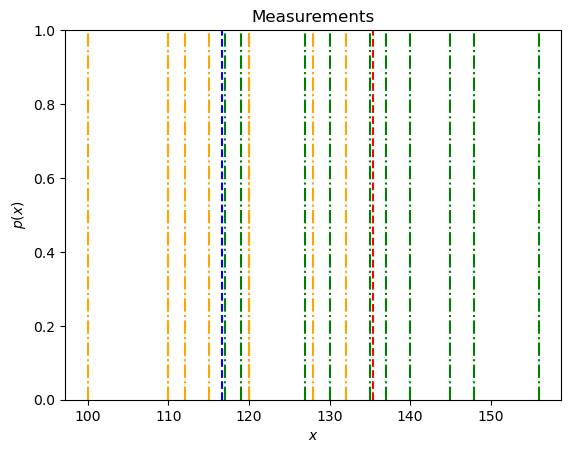

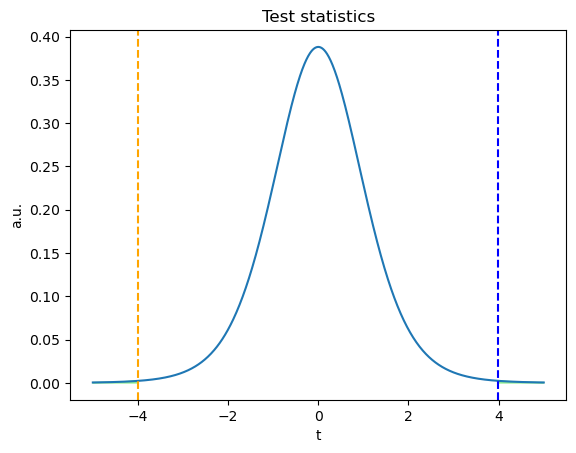

p-value = 0.0031489409354536393


In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n=len(pre)
mean_pre=np.mean(pre)
std_pre=np.std(pre)

mean_post=np.mean(post)
std_post=np.std(post)

sigma=sqrt((std_pre**2+std_post**2)/2)
print('sigma :',sigma)
t=(mean_pre-mean_post)/(sigma*sqrt(2/n))
print('T :',t)
#plot the measurents
plt.axvline(mean_post, linestyle='--', color='red')
plt.axvline(mean_pre,linestyle='--',color='blue')
for l,j in zip(pre,post):
    plt.axvline(l, linestyle='-.', color='orange')
    plt.axvline(j, linestyle='-.', color='green')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()


# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(t), color='lightgreen')
plt.axvline(t, linestyle='--', color='orange')
plt.axvline(-t, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()
pvalue = stats.t.cdf(t, n - 1) + (1. - stats.t.cdf(-t, n - 1))
print("p-value =", pvalue)




3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

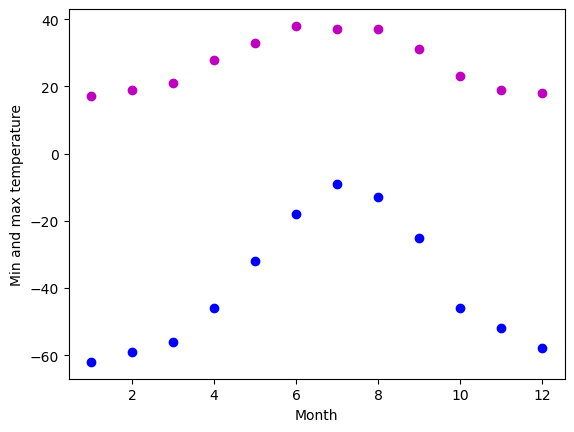

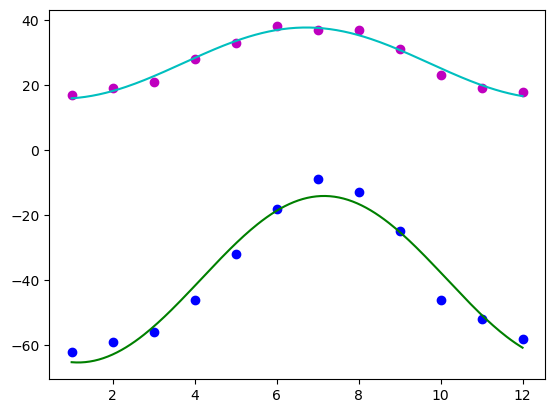

In [4]:
max_t=[17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]

min_t=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
#plot these temperature
months = np.arange(1,13)
max_t_mean = np.mean(max_t)
max_t_range = (np.max(max_t) - np.min(max_t)) / 2

min_t_mean = np.mean(min_t)
min_t_range = (np.max(min_t) - np.min(min_t)) / 2

plt.plot(months, max_t, 'mo', months, min_t, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

def t_f(t, T, amp, t0 ):
    return T+(amp*np.cos((t+t0)*2*pi/t.max()))

p_max, cov_max = optimize.curve_fit(t_f, months, max_t,p0=[max_t_mean,max_t_range,7])
p_min, cov_min = optimize.curve_fit(t_f, months, min_t,p0=[min_t_mean,min_t_range,7])

timespan_fractionOfMonth = np.linspace(1, 12, num=200)
plt.figure()
plt.plot(months, max_t, 'mo', months, min_t, 'bo')
plt.plot(timespan_fractionOfMonth, t_f(timespan_fractionOfMonth, *p_max), 'c-')
plt.plot(timespan_fractionOfMonth, t_f(timespan_fractionOfMonth, *p_min), 'g-')
plt.show()


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

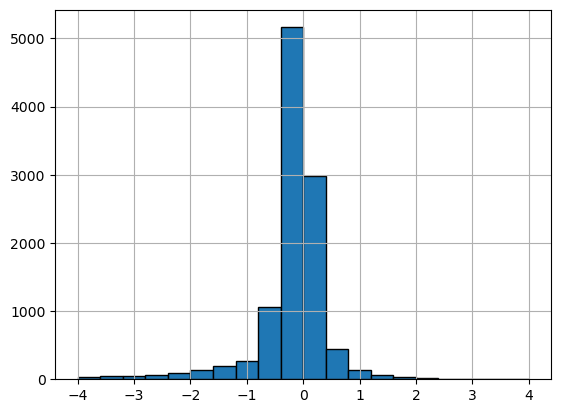

Uncertainities: 
 [ 5.65685425  6.40312424  6.92820323  8.          9.43398113 11.61895004
 13.74772708 16.52271164 32.66496594 71.84705979 54.56189146 21.14237451
 11.95826074  8.1240384   5.56776436  3.46410162  3.          2.
  1.41421356  1.73205081]
p-value =  0.0


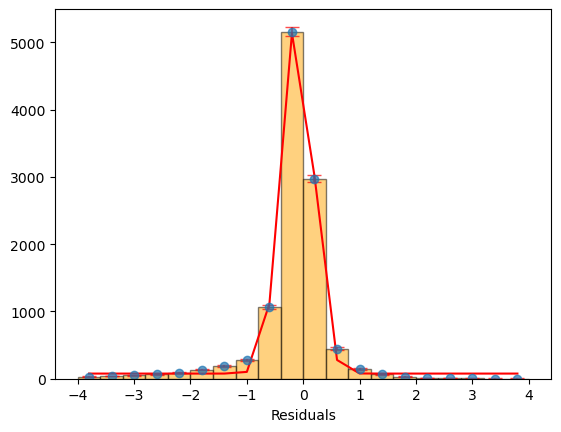

In [5]:
from matplotlib.ticker import MultipleLocator
import scipy 
from scipy.optimize import curve_fit
data_path = "data/residuals_261.pkl"
data = np.load(data_path, allow_pickle=True).reshape(-1)[0]
residual=data['residuals']

the_range = (-4,4)
nbins=20
h, bins, _ = plt.hist(residual, bins = nbins, range=the_range, edgecolor='black')
plt.grid()
plt.show()

p_uncertainity = np.sqrt(h)
bin_center = (bins[:-1] + bins[1:])/2

plt.errorbar(bin_center, h, yerr=p_uncertainity, fmt='o', ecolor='red', capsize=5, alpha=0.7)
plt.hist(residual, bins=nbins, range=(-4,4), alpha=0.5, color='orange', linewidth=1, edgecolor='black')
plt.xlabel('Residuals')
print('Uncertainities: \n',p_uncertainity)


def f(x, a, b, c,d):
    return a * np.exp(-(x - b)**2 / ( c**2))+d

popt, pcov = optimize.curve_fit(f, bin_center, h, p0=[1,1,1,0])
plt.plot(bin_center, f(bin_center, *popt), color='red', label='fitted curve of the residuals')
sigma_y = np.sqrt(np.abs(h))
chi_squared= np.sum((h - f(bin_center, *popt))**2 / f(bin_center, *popt))
ndof = nbins - 1
pvalue = 1. - scipy.stats.chi2.cdf(chi_squared, ndof)
print('p-value = ', pvalue)


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

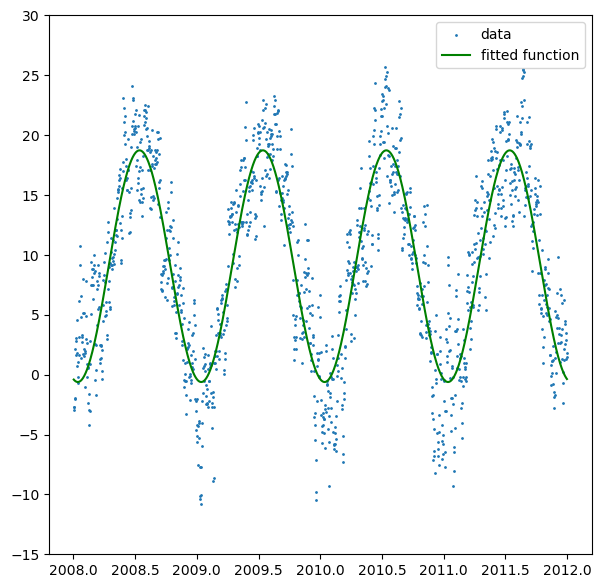

 The temperature mean in Munich  8.94
 Coldest time of the year  -0.62
 Hottest time of the year  18.72


In [6]:
import pandas as pd
path='data/munich_temperatures_average_with_bad_data.txt'
df = np.loadtxt(path)
def f(t,a,b,c):
    return (a*np.cos(2*np.pi*t+b))+c
date=df[:,0]

temp=df[:,1]
popt, pcov = optimize.curve_fit(f, date, temp)
fit=f(date,popt[0],popt[1],popt[2])

range_date = np.bitwise_and(date >= 2008., date <= 2012.)
date_n=date[range_date]
temp_n=temp[range_date]

fit_n=fit[range_date]
plt.figure(figsize=(7,7))
plt.scatter(date_n,temp_n, s=1,label='data')
plt.plot(date_n, fit_n, color='green',label='fitted function')
plt.legend(loc='best')
plt.ylim(-15,30)
plt.show()

print(' The temperature mean in Munich ', round(np.mean(temp),2))
print(' Coldest time of the year ' , round(np.min(fit),2))
print(' Hottest time of the year ' ,round(np.max(fit),2))